## 🏠 Boston House Price Prediction — Project Overview

## 🧩 Problem Statement
This project involves predicting the median value of owner-occupied homes in Boston. Using the **Boston Housing Dataset**, we implemented **XGBoost Regression** with **Optuna** tuning to handle the non-linear relationships between housing prices and neighborhood characteristics.

---

## 🧬 Key Features Used
- **RM**: Average number of rooms per dwelling.
- **LSTAT**: Percentage of lower status of the population.
- **PTRATIO**: Pupil-teacher ratio by town.
- **CRIM**: Per capita crime rate by town.
- **NOX**: Nitric oxides concentration (Environmental factor).

---

## 🛠️ Model & Optimization
- **Algorithm**: XGBoost Regressor.
- **Optimization**: Used **Optuna Visualization** (Slice plots) to analyze how different parameters like `max_depth` and `alpha` affect the model's performance.
- **Evaluation**: Focused on minimizing **RMSE** (Root Mean Squared Error).

---

## 📚 Steps Performed
1. **Data Loading**: Integrated the Boston housing data.
2. **Feature Engineering**: Standardized features to ensure model stability.
3. **Hyperparameter Search**: Defined an objective function for Optuna to find the most efficient XGBoost parameters.
4. **Visualization**: Plotted the "Slice Plot" to see the parameter search space.

### XGBoost Regreesion with optuna

#### Import the usable library

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import optuna

### Load the dataset"

In [16]:
df=pd.read_csv("C:\\machile learnig implementation\\Supervised\\linear regression\\task5\\Boston.csv")

In [17]:
df

,serial no,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [18]:
df.isnull().sum()

serial no    0
crim         0
zn           0
indus        0
chas         0
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
medv         0
dtype: int64

In [19]:
df.isna().sum()

serial no    0
crim         0
zn           0
indus        0
chas         0
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
medv         0
dtype: int64

#### In this dataset  there are not any type of the null and nan value are present

In [20]:
df.describe()

,serial no,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
df.drop(columns="serial no",inplace=True)

In [23]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Now divide the dataset into two part label and feature column

In [24]:
x=df.drop(columns="medv")

In [25]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [26]:
y=df.medv

In [27]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

### optuna

In [39]:
def objective(trail,data=x,target=y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
    param={
        "tree_method":"hist",
        "lembda":trail.suggest_float("lembda",1e-4,10.0,log=True),
        "alpha":trail.suggest_float("alpha",1e-4,10,log=True),
        "colsample_bytree":trail.suggest_categorical("colsample_bytree",[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        "subsample":trail.suggest_categorical("subsample",[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        "learning_rate":trail.suggest_categorical("learning_rate",[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,1]),
        "n_estimators":3000,
        "max_depth":trail.suggest_categorical("max_depth",[2,3,5,7,8,9,10,13]),
        "random_state":trail.suggest_categorical("random_state",[10,20,50,300,3345,23456]),
        "min_child_weight":trail.suggest_int("min_child_weight",1,200)
    }
    xgb_model=xgb.XGBRegressor(**param)
    xgb_model.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=True)
    pred_xgb=xgb_model.predict(x_test)
    rmse=mean_squared_error(y_test,pred_xgb)
    return rmse

In [40]:
find_parameter=optuna.create_study(direction="minimize")
find_parameter.optimize(objective,n_trials=20)
find_parameter.best_params


[I 2025-12-16 17:11:14,851] A new study created in memory with name: no-name-7bec44d2-ceb2-43cc-97c9-52db44a7aa7c


[0]	validation_0-rmse:9.83340
[1]	validation_0-rmse:9.82763
[2]	validation_0-rmse:9.82189
[3]	validation_0-rmse:9.81657
[4]	validation_0-rmse:9.81147
[5]	validation_0-rmse:9.80534
[6]	validation_0-rmse:9.79981
[7]	validation_0-rmse:9.79442
[8]	validation_0-rmse:9.78812
[9]	validation_0-rmse:9.78603
[10]	validation_0-rmse:9.78266
[11]	validation_0-rmse:9.77866
[12]	validation_0-rmse:9.77260
[13]	validation_0-rmse:9.76685
[14]	validation_0-rmse:9.76308
[15]	validation_0-rmse:9.75720
[16]	validation_0-rmse:9.75235
[17]	validation_0-rmse:9.74671
[18]	validation_0-rmse:9.74164
[19]	validation_0-rmse:9.73430
[20]	validation_0-rmse:9.73114
[21]	validation_0-rmse:9.72682
[22]	validation_0-rmse:9.72353
[23]	validation_0-rmse:9.71979
[24]	validation_0-rmse:9.71476
[25]	validation_0-rmse:9.70863
[26]	validation_0-rmse:9.70493
[27]	validation_0-rmse:9.70052
[28]	validation_0-rmse:9.69502
[29]	validation_0-rmse:9.69037
[30]	validation_0-rmse:9.68642
[31]	validation_0-rmse:9.68218
[32]	validation_0-

[I 2025-12-16 17:11:24,802] Trial 0 finished with value: 19.51500181120608 and parameters: {'lembda': 0.2828184487226048, 'alpha': 8.90768174288522, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'random_state': 23456, 'min_child_weight': 11}. Best is trial 0 with value: 19.51500181120608.


[0]	validation_0-rmse:9.83783
[1]	validation_0-rmse:9.83735
[2]	validation_0-rmse:9.83712
[3]	validation_0-rmse:9.83665
[4]	validation_0-rmse:9.83647
[5]	validation_0-rmse:9.83610
[6]	validation_0-rmse:9.83585
[7]	validation_0-rmse:9.83540
[8]	validation_0-rmse:9.83506
[9]	validation_0-rmse:9.83455
[10]	validation_0-rmse:9.83441
[11]	validation_0-rmse:9.83421
[12]	validation_0-rmse:9.83394
[13]	validation_0-rmse:9.83353
[14]	validation_0-rmse:9.83335
[15]	validation_0-rmse:9.83288
[16]	validation_0-rmse:9.83253
[17]	validation_0-rmse:9.83233
[18]	validation_0-rmse:9.83194
[19]	validation_0-rmse:9.83174
[20]	validation_0-rmse:9.83149
[21]	validation_0-rmse:9.83127
[22]	validation_0-rmse:9.83076
[23]	validation_0-rmse:9.83030
[24]	validation_0-rmse:9.82982
[25]	validation_0-rmse:9.82960
[26]	validation_0-rmse:9.82933
[27]	validation_0-rmse:9.82903
[28]	validation_0-rmse:9.82881
[29]	validation_0-rmse:9.82838
[30]	validation_0-rmse:9.82814
[31]	validation_0-rmse:9.82789
[32]	validation_0-

[I 2025-12-16 17:11:35,112] Trial 1 finished with value: 82.03336813994898 and parameters: {'lembda': 0.003932966166786904, 'alpha': 0.1511841954326899, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0001, 'max_depth': 10, 'random_state': 3345, 'min_child_weight': 45}. Best is trial 0 with value: 19.51500181120608.


[0]	validation_0-rmse:9.83799
[1]	validation_0-rmse:9.83798
[2]	validation_0-rmse:9.83798
[3]	validation_0-rmse:9.83799
[4]	validation_0-rmse:9.83799
[5]	validation_0-rmse:9.83799
[6]	validation_0-rmse:9.83799
[7]	validation_0-rmse:9.83799
[8]	validation_0-rmse:9.83799
[9]	validation_0-rmse:9.83799
[10]	validation_0-rmse:9.83799
[11]	validation_0-rmse:9.83799
[12]	validation_0-rmse:9.83799
[13]	validation_0-rmse:9.83799
[14]	validation_0-rmse:9.83799
[15]	validation_0-rmse:9.83799
[16]	validation_0-rmse:9.83799
[17]	validation_0-rmse:9.83799
[18]	validation_0-rmse:9.83799
[19]	validation_0-rmse:9.83799
[20]	validation_0-rmse:9.83799
[21]	validation_0-rmse:9.83799
[22]	validation_0-rmse:9.83798
[23]	validation_0-rmse:9.83799
[24]	validation_0-rmse:9.83799
[25]	validation_0-rmse:9.83799
[26]	validation_0-rmse:9.83799
[27]	validation_0-rmse:9.83799
[28]	validation_0-rmse:9.83799
[29]	validation_0-rmse:9.83799
[30]	validation_0-rmse:9.83800
[31]	validation_0-rmse:9.83799
[32]	validation_0-

[I 2025-12-16 17:11:44,470] Trial 2 finished with value: 96.77763861073227 and parameters: {'lembda': 0.5699660068309259, 'alpha': 0.028540941627328047, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.0001, 'max_depth': 13, 'random_state': 3345, 'min_child_weight': 178}. Best is trial 0 with value: 19.51500181120608.


[0]	validation_0-rmse:8.74510
[1]	validation_0-rmse:8.12095
[2]	validation_0-rmse:7.65440
[3]	validation_0-rmse:7.22364
[4]	validation_0-rmse:6.95953
[5]	validation_0-rmse:6.81724
[6]	validation_0-rmse:6.74104
[7]	validation_0-rmse:6.56291
[8]	validation_0-rmse:6.52709
[9]	validation_0-rmse:6.47518
[10]	validation_0-rmse:6.45002
[11]	validation_0-rmse:6.39940
[12]	validation_0-rmse:6.36424
[13]	validation_0-rmse:6.33930
[14]	validation_0-rmse:6.32982
[15]	validation_0-rmse:6.29337
[16]	validation_0-rmse:6.26833
[17]	validation_0-rmse:6.20431
[18]	validation_0-rmse:6.19561
[19]	validation_0-rmse:6.19962
[20]	validation_0-rmse:6.17037
[21]	validation_0-rmse:6.14053
[22]	validation_0-rmse:6.10394
[23]	validation_0-rmse:6.10793
[24]	validation_0-rmse:6.06808
[25]	validation_0-rmse:6.05197
[26]	validation_0-rmse:6.03043
[27]	validation_0-rmse:6.03034
[28]	validation_0-rmse:6.03183
[29]	validation_0-rmse:6.01840
[30]	validation_0-rmse:6.00789
[31]	validation_0-rmse:6.00149
[32]	validation_0-

[I 2025-12-16 17:11:54,490] Trial 3 finished with value: 36.64812825339544 and parameters: {'lembda': 0.19066139026375878, 'alpha': 0.0053387996037223325, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.3, 'max_depth': 8, 'random_state': 3345, 'min_child_weight': 115}. Best is trial 0 with value: 19.51500181120608.


[0]	validation_0-rmse:8.30632
[1]	validation_0-rmse:7.58897
[2]	validation_0-rmse:7.15646
[3]	validation_0-rmse:6.36216
[4]	validation_0-rmse:6.18290
[5]	validation_0-rmse:5.97733
[6]	validation_0-rmse:5.52418
[7]	validation_0-rmse:5.27033
[8]	validation_0-rmse:4.88537
[9]	validation_0-rmse:4.60183
[10]	validation_0-rmse:4.45149
[11]	validation_0-rmse:4.42149
[12]	validation_0-rmse:4.35172
[13]	validation_0-rmse:4.20941
[14]	validation_0-rmse:4.17719
[15]	validation_0-rmse:4.05352
[16]	validation_0-rmse:4.07321
[17]	validation_0-rmse:3.91643
[18]	validation_0-rmse:3.85483
[19]	validation_0-rmse:3.79958
[20]	validation_0-rmse:3.81995
[21]	validation_0-rmse:3.86160
[22]	validation_0-rmse:3.84944
[23]	validation_0-rmse:3.84350
[24]	validation_0-rmse:3.86162
[25]	validation_0-rmse:3.85407
[26]	validation_0-rmse:3.85004
[27]	validation_0-rmse:3.79656
[28]	validation_0-rmse:3.76529
[29]	validation_0-rmse:3.77705
[30]	validation_0-rmse:3.81083
[31]	validation_0-rmse:3.75332
[32]	validation_0-

[I 2025-12-16 17:12:04,716] Trial 4 finished with value: 18.240433160028577 and parameters: {'lembda': 0.00012692199754663986, 'alpha': 0.000689905298017468, 'colsample_bytree': 0.5, 'subsample': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'random_state': 10, 'min_child_weight': 16}. Best is trial 4 with value: 18.240433160028577.


[0]	validation_0-rmse:9.83594
[1]	validation_0-rmse:9.83599
[2]	validation_0-rmse:9.83541
[3]	validation_0-rmse:9.83540
[4]	validation_0-rmse:9.83542
[5]	validation_0-rmse:9.83539
[6]	validation_0-rmse:9.83539
[7]	validation_0-rmse:9.83540
[8]	validation_0-rmse:9.83538
[9]	validation_0-rmse:9.83540
[10]	validation_0-rmse:9.83168
[11]	validation_0-rmse:9.83166
[12]	validation_0-rmse:9.83165
[13]	validation_0-rmse:9.83169
[14]	validation_0-rmse:9.83170
[15]	validation_0-rmse:9.83170
[16]	validation_0-rmse:9.83170
[17]	validation_0-rmse:9.83171
[18]	validation_0-rmse:9.83169
[19]	validation_0-rmse:9.83171
[20]	validation_0-rmse:9.83169
[21]	validation_0-rmse:9.83171
[22]	validation_0-rmse:9.83166
[23]	validation_0-rmse:9.82986
[24]	validation_0-rmse:9.82984
[25]	validation_0-rmse:9.82982
[26]	validation_0-rmse:9.82987
[27]	validation_0-rmse:9.82986
[28]	validation_0-rmse:9.82990
[29]	validation_0-rmse:9.82993
[30]	validation_0-rmse:9.82991
[31]	validation_0-rmse:9.82990
[32]	validation_0-

[I 2025-12-16 17:12:15,599] Trial 5 finished with value: 83.87119751042671 and parameters: {'lembda': 0.017070051384716015, 'alpha': 0.1781425115200133, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.001, 'max_depth': 7, 'random_state': 10, 'min_child_weight': 87}. Best is trial 4 with value: 18.240433160028577.


[0]	validation_0-rmse:9.25395
[1]	validation_0-rmse:8.70395
[2]	validation_0-rmse:8.29436
[3]	validation_0-rmse:7.89801
[4]	validation_0-rmse:7.55765
[5]	validation_0-rmse:7.27360
[6]	validation_0-rmse:6.99800
[7]	validation_0-rmse:6.74732
[8]	validation_0-rmse:6.51135
[9]	validation_0-rmse:6.36171
[10]	validation_0-rmse:6.17803
[11]	validation_0-rmse:6.00305
[12]	validation_0-rmse:5.83631
[13]	validation_0-rmse:5.70858
[14]	validation_0-rmse:5.57384
[15]	validation_0-rmse:5.48429
[16]	validation_0-rmse:5.38965
[17]	validation_0-rmse:5.30167
[18]	validation_0-rmse:5.20514
[19]	validation_0-rmse:5.13031
[20]	validation_0-rmse:5.03814
[21]	validation_0-rmse:4.95502
[22]	validation_0-rmse:4.88247
[23]	validation_0-rmse:4.86243
[24]	validation_0-rmse:4.80784
[25]	validation_0-rmse:4.76238
[26]	validation_0-rmse:4.74267
[27]	validation_0-rmse:4.69909
[28]	validation_0-rmse:4.66247
[29]	validation_0-rmse:4.60145
[30]	validation_0-rmse:4.58971
[31]	validation_0-rmse:4.57028
[32]	validation_0-

[I 2025-12-16 17:12:26,851] Trial 6 finished with value: 14.708936290793464 and parameters: {'lembda': 0.008916162945205334, 'alpha': 0.0002681997659346281, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'random_state': 3345, 'min_child_weight': 41}. Best is trial 6 with value: 14.708936290793464.


[0]	validation_0-rmse:9.83798
[1]	validation_0-rmse:9.83798
[2]	validation_0-rmse:9.83722
[3]	validation_0-rmse:9.83722
[4]	validation_0-rmse:9.83722
[5]	validation_0-rmse:9.83722
[6]	validation_0-rmse:9.83722
[7]	validation_0-rmse:9.83722
[8]	validation_0-rmse:9.83722
[9]	validation_0-rmse:9.83722
[10]	validation_0-rmse:9.83722
[11]	validation_0-rmse:9.83776
[12]	validation_0-rmse:9.83776
[13]	validation_0-rmse:9.83776
[14]	validation_0-rmse:9.83776
[15]	validation_0-rmse:9.83776
[16]	validation_0-rmse:9.83776
[17]	validation_0-rmse:9.83776
[18]	validation_0-rmse:9.83776
[19]	validation_0-rmse:9.83685
[20]	validation_0-rmse:9.83685
[21]	validation_0-rmse:9.83685
[22]	validation_0-rmse:9.83633
[23]	validation_0-rmse:9.83633
[24]	validation_0-rmse:9.83633
[25]	validation_0-rmse:9.83633
[26]	validation_0-rmse:9.83633
[27]	validation_0-rmse:9.83633
[28]	validation_0-rmse:9.83633
[29]	validation_0-rmse:9.83449
[30]	validation_0-rmse:9.83449
[31]	validation_0-rmse:9.83449
[32]	validation_0-

[I 2025-12-16 17:12:35,396] Trial 7 finished with value: 96.70397972909312 and parameters: {'lembda': 0.0004953601426215383, 'alpha': 0.00010082143755552317, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.05, 'max_depth': 2, 'random_state': 20, 'min_child_weight': 176}. Best is trial 6 with value: 14.708936290793464.


[0]	validation_0-rmse:9.79216
[1]	validation_0-rmse:9.76755
[2]	validation_0-rmse:9.74641
[3]	validation_0-rmse:9.71797
[4]	validation_0-rmse:9.67505
[5]	validation_0-rmse:9.63545
[6]	validation_0-rmse:9.59337
[7]	validation_0-rmse:9.55214
[8]	validation_0-rmse:9.51715
[9]	validation_0-rmse:9.49420
[10]	validation_0-rmse:9.48658
[11]	validation_0-rmse:9.45975
[12]	validation_0-rmse:9.44120
[13]	validation_0-rmse:9.42539
[14]	validation_0-rmse:9.40869
[15]	validation_0-rmse:9.39113
[16]	validation_0-rmse:9.37475
[17]	validation_0-rmse:9.35708
[18]	validation_0-rmse:9.33670
[19]	validation_0-rmse:9.32028
[20]	validation_0-rmse:9.27753
[21]	validation_0-rmse:9.24890
[22]	validation_0-rmse:9.23359
[23]	validation_0-rmse:9.19587
[24]	validation_0-rmse:9.18332
[25]	validation_0-rmse:9.16401
[26]	validation_0-rmse:9.15416
[27]	validation_0-rmse:9.12126
[28]	validation_0-rmse:9.10092
[29]	validation_0-rmse:9.08930
[30]	validation_0-rmse:9.07070
[31]	validation_0-rmse:9.06437
[32]	validation_0-

[I 2025-12-16 17:12:44,653] Trial 8 finished with value: 24.764335265202348 and parameters: {'lembda': 0.003927650089870042, 'alpha': 0.0012434403128928238, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 9, 'random_state': 20, 'min_child_weight': 54}. Best is trial 6 with value: 14.708936290793464.


[0]	validation_0-rmse:9.83798
[1]	validation_0-rmse:9.83798
[2]	validation_0-rmse:9.83798
[3]	validation_0-rmse:9.83798
[4]	validation_0-rmse:9.83798
[5]	validation_0-rmse:9.83798
[6]	validation_0-rmse:9.83798
[7]	validation_0-rmse:9.83798
[8]	validation_0-rmse:9.83798
[9]	validation_0-rmse:9.83798
[10]	validation_0-rmse:9.83798
[11]	validation_0-rmse:9.83798
[12]	validation_0-rmse:9.83798
[13]	validation_0-rmse:9.83798
[14]	validation_0-rmse:9.83798
[15]	validation_0-rmse:9.83798
[16]	validation_0-rmse:9.83798
[17]	validation_0-rmse:9.83798
[18]	validation_0-rmse:9.83798
[19]	validation_0-rmse:9.83798
[20]	validation_0-rmse:9.83798
[21]	validation_0-rmse:9.83798
[22]	validation_0-rmse:9.83798
[23]	validation_0-rmse:9.83798
[24]	validation_0-rmse:9.83798
[25]	validation_0-rmse:9.83798
[26]	validation_0-rmse:9.83798
[27]	validation_0-rmse:9.83798
[28]	validation_0-rmse:9.83798
[29]	validation_0-rmse:9.83798
[30]	validation_0-rmse:9.83798
[31]	validation_0-rmse:9.83798
[32]	validation_0-

[I 2025-12-16 17:12:52,836] Trial 9 finished with value: 96.78591749275482 and parameters: {'lembda': 0.04354304354414529, 'alpha': 0.00011231668365265326, 'colsample_bytree': 0.5, 'subsample': 0.1, 'learning_rate': 0.05, 'max_depth': 13, 'random_state': 10, 'min_child_weight': 175}. Best is trial 6 with value: 14.708936290793464.


[0]	validation_0-rmse:9.63153
[1]	validation_0-rmse:9.26285
[2]	validation_0-rmse:8.94903
[3]	validation_0-rmse:8.68413
[4]	validation_0-rmse:8.56648
[5]	validation_0-rmse:8.43973
[6]	validation_0-rmse:8.27342
[7]	validation_0-rmse:8.12949
[8]	validation_0-rmse:7.96312
[9]	validation_0-rmse:7.80681
[10]	validation_0-rmse:7.74183
[11]	validation_0-rmse:7.67286
[12]	validation_0-rmse:7.63279
[13]	validation_0-rmse:7.54696
[14]	validation_0-rmse:7.46688
[15]	validation_0-rmse:7.38849
[16]	validation_0-rmse:7.35157
[17]	validation_0-rmse:7.28724
[18]	validation_0-rmse:7.27968
[19]	validation_0-rmse:7.26674
[20]	validation_0-rmse:7.20955
[21]	validation_0-rmse:7.18944
[22]	validation_0-rmse:7.13483
[23]	validation_0-rmse:7.13303
[24]	validation_0-rmse:7.08722
[25]	validation_0-rmse:7.06876
[26]	validation_0-rmse:7.06806
[27]	validation_0-rmse:7.06268
[28]	validation_0-rmse:7.05423
[29]	validation_0-rmse:7.02047
[30]	validation_0-rmse:6.99567
[31]	validation_0-rmse:6.97626
[32]	validation_0-

[I 2025-12-16 17:13:01,382] Trial 10 finished with value: 35.31015052334056 and parameters: {'lembda': 4.49180546970646, 'alpha': 3.298820652159093, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.1, 'max_depth': 2, 'random_state': 300, 'min_child_weight': 118}. Best is trial 6 with value: 14.708936290793464.


[0]	validation_0-rmse:9.58739
[1]	validation_0-rmse:9.26963
[2]	validation_0-rmse:9.11630
[3]	validation_0-rmse:8.90151
[4]	validation_0-rmse:8.59548
[5]	validation_0-rmse:8.14677
[6]	validation_0-rmse:7.98077
[7]	validation_0-rmse:7.90085
[8]	validation_0-rmse:7.78648
[9]	validation_0-rmse:7.34769
[10]	validation_0-rmse:7.09717
[11]	validation_0-rmse:6.89150
[12]	validation_0-rmse:6.51958
[13]	validation_0-rmse:6.48507
[14]	validation_0-rmse:6.20063
[15]	validation_0-rmse:6.16452
[16]	validation_0-rmse:6.10333
[17]	validation_0-rmse:5.96014
[18]	validation_0-rmse:5.93693
[19]	validation_0-rmse:5.89998
[20]	validation_0-rmse:5.70511
[21]	validation_0-rmse:5.66202
[22]	validation_0-rmse:5.64571
[23]	validation_0-rmse:5.44122
[24]	validation_0-rmse:5.44816
[25]	validation_0-rmse:5.28167
[26]	validation_0-rmse:5.11947
[27]	validation_0-rmse:5.10785
[28]	validation_0-rmse:5.09993
[29]	validation_0-rmse:4.94398
[30]	validation_0-rmse:4.93715
[31]	validation_0-rmse:4.80844
[32]	validation_0-

[I 2025-12-16 17:13:11,164] Trial 11 finished with value: 14.154464543906174 and parameters: {'lembda': 0.00019780149225512522, 'alpha': 0.001048174425341956, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 5}. Best is trial 11 with value: 14.154464543906174.


[0]	validation_0-rmse:9.57692
[1]	validation_0-rmse:9.31205
[2]	validation_0-rmse:9.15953
[3]	validation_0-rmse:8.99026
[4]	validation_0-rmse:8.67702
[5]	validation_0-rmse:8.22406
[6]	validation_0-rmse:8.04910
[7]	validation_0-rmse:7.97991
[8]	validation_0-rmse:7.85744
[9]	validation_0-rmse:7.41221
[10]	validation_0-rmse:7.13856
[11]	validation_0-rmse:6.93025
[12]	validation_0-rmse:6.59533
[13]	validation_0-rmse:6.53932
[14]	validation_0-rmse:6.31916
[15]	validation_0-rmse:6.27154
[16]	validation_0-rmse:6.22417
[17]	validation_0-rmse:6.11463
[18]	validation_0-rmse:6.07085
[19]	validation_0-rmse:6.05607
[20]	validation_0-rmse:5.86060
[21]	validation_0-rmse:5.83465
[22]	validation_0-rmse:5.79958
[23]	validation_0-rmse:5.57410
[24]	validation_0-rmse:5.55784
[25]	validation_0-rmse:5.37839
[26]	validation_0-rmse:5.23369
[27]	validation_0-rmse:5.21519
[28]	validation_0-rmse:5.20486
[29]	validation_0-rmse:5.06220
[30]	validation_0-rmse:5.05521
[31]	validation_0-rmse:4.92498
[32]	validation_0-

[I 2025-12-16 17:13:20,509] Trial 12 finished with value: 13.503008723612671 and parameters: {'lembda': 0.000745152823414208, 'alpha': 0.0012791134555664167, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 1}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.58740
[1]	validation_0-rmse:9.28862
[2]	validation_0-rmse:9.13288
[3]	validation_0-rmse:8.95795
[4]	validation_0-rmse:8.65825
[5]	validation_0-rmse:8.20752
[6]	validation_0-rmse:8.03861
[7]	validation_0-rmse:7.95847
[8]	validation_0-rmse:7.83011
[9]	validation_0-rmse:7.39286
[10]	validation_0-rmse:7.12730
[11]	validation_0-rmse:6.93692
[12]	validation_0-rmse:6.59222
[13]	validation_0-rmse:6.54749
[14]	validation_0-rmse:6.26962
[15]	validation_0-rmse:6.22811
[16]	validation_0-rmse:6.17309
[17]	validation_0-rmse:6.02474
[18]	validation_0-rmse:5.99553
[19]	validation_0-rmse:5.97080
[20]	validation_0-rmse:5.76638
[21]	validation_0-rmse:5.72238
[22]	validation_0-rmse:5.70452
[23]	validation_0-rmse:5.49608
[24]	validation_0-rmse:5.50990
[25]	validation_0-rmse:5.36845
[26]	validation_0-rmse:5.21825
[27]	validation_0-rmse:5.20119
[28]	validation_0-rmse:5.18943
[29]	validation_0-rmse:5.03808
[30]	validation_0-rmse:5.03074
[31]	validation_0-rmse:4.89728
[32]	validation_0-

[I 2025-12-16 17:13:30,787] Trial 13 finished with value: 14.749766006832408 and parameters: {'lembda': 0.0009000850840890937, 'alpha': 0.007330908826207345, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 4}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.61270
[1]	validation_0-rmse:9.40400
[2]	validation_0-rmse:9.27659
[3]	validation_0-rmse:9.20316
[4]	validation_0-rmse:9.05259
[5]	validation_0-rmse:8.77888
[6]	validation_0-rmse:8.64128
[7]	validation_0-rmse:8.60450
[8]	validation_0-rmse:8.49597
[9]	validation_0-rmse:8.18268
[10]	validation_0-rmse:8.05985
[11]	validation_0-rmse:8.03028
[12]	validation_0-rmse:7.76132
[13]	validation_0-rmse:7.71687
[14]	validation_0-rmse:7.56860
[15]	validation_0-rmse:7.53753
[16]	validation_0-rmse:7.52212
[17]	validation_0-rmse:7.51322
[18]	validation_0-rmse:7.48898
[19]	validation_0-rmse:7.47488
[20]	validation_0-rmse:7.31325
[21]	validation_0-rmse:7.31170
[22]	validation_0-rmse:7.30427
[23]	validation_0-rmse:7.16292
[24]	validation_0-rmse:7.15592
[25]	validation_0-rmse:7.03645
[26]	validation_0-rmse:6.93663
[27]	validation_0-rmse:6.92631
[28]	validation_0-rmse:6.92085
[29]	validation_0-rmse:6.80161
[30]	validation_0-rmse:6.80232
[31]	validation_0-rmse:6.74402
[32]	validation_0-

[I 2025-12-16 17:13:39,414] Trial 14 finished with value: 24.8577357773454 and parameters: {'lembda': 0.00018794675023769543, 'alpha': 0.0027523693642167797, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 72}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.39386
[1]	validation_0-rmse:9.03677
[2]	validation_0-rmse:8.80075
[3]	validation_0-rmse:8.58579
[4]	validation_0-rmse:8.25632
[5]	validation_0-rmse:7.72395
[6]	validation_0-rmse:7.60689
[7]	validation_0-rmse:7.53916
[8]	validation_0-rmse:7.45577
[9]	validation_0-rmse:6.91889
[10]	validation_0-rmse:6.67934
[11]	validation_0-rmse:6.51004
[12]	validation_0-rmse:6.10024
[13]	validation_0-rmse:6.06929
[14]	validation_0-rmse:5.84087
[15]	validation_0-rmse:5.83496
[16]	validation_0-rmse:5.78412
[17]	validation_0-rmse:5.67517
[18]	validation_0-rmse:5.64646
[19]	validation_0-rmse:5.65207
[20]	validation_0-rmse:5.44804
[21]	validation_0-rmse:5.40648
[22]	validation_0-rmse:5.44458
[23]	validation_0-rmse:5.21773
[24]	validation_0-rmse:5.17438
[25]	validation_0-rmse:5.05030
[26]	validation_0-rmse:4.94758
[27]	validation_0-rmse:4.92180
[28]	validation_0-rmse:4.92137
[29]	validation_0-rmse:4.81810
[30]	validation_0-rmse:4.81235
[31]	validation_0-rmse:4.75419
[32]	validation_0-

[I 2025-12-16 17:13:49,457] Trial 15 finished with value: 18.146734837333664 and parameters: {'lembda': 0.0009768785094079308, 'alpha': 0.02163134107008224, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 29}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:6.32676
[1]	validation_0-rmse:6.14087
[2]	validation_0-rmse:6.00441
[3]	validation_0-rmse:5.51792
[4]	validation_0-rmse:6.40694
[5]	validation_0-rmse:6.91034
[6]	validation_0-rmse:7.44985
[7]	validation_0-rmse:7.43967
[8]	validation_0-rmse:8.20286
[9]	validation_0-rmse:8.76292
[10]	validation_0-rmse:8.40666
[11]	validation_0-rmse:8.89912
[12]	validation_0-rmse:10.63914
[13]	validation_0-rmse:10.86047
[14]	validation_0-rmse:11.31183
[15]	validation_0-rmse:11.43887
[16]	validation_0-rmse:12.07869
[17]	validation_0-rmse:12.65170
[18]	validation_0-rmse:12.63672
[19]	validation_0-rmse:12.31152
[20]	validation_0-rmse:13.68666
[21]	validation_0-rmse:14.28252
[22]	validation_0-rmse:14.61917
[23]	validation_0-rmse:14.66740
[24]	validation_0-rmse:18.11780
[25]	validation_0-rmse:18.58716
[26]	validation_0-rmse:18.19921
[27]	validation_0-rmse:17.85622
[28]	validation_0-rmse:19.78305
[29]	validation_0-rmse:19.57275
[30]	validation_0-rmse:20.24963
[31]	validation_0-rmse:20.8385

[I 2025-12-16 17:13:58,382] Trial 16 finished with value: 4.215327457348504e+38 and parameters: {'lembda': 0.0003871672231823828, 'alpha': 0.000799923780414264, 'colsample_bytree': 0.6, 'subsample': 0.2, 'learning_rate': 1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 1}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.26991
[1]	validation_0-rmse:8.76540
[2]	validation_0-rmse:8.33350
[3]	validation_0-rmse:7.94985
[4]	validation_0-rmse:7.62369
[5]	validation_0-rmse:7.33167
[6]	validation_0-rmse:7.06826
[7]	validation_0-rmse:6.84493
[8]	validation_0-rmse:6.60742
[9]	validation_0-rmse:6.45130
[10]	validation_0-rmse:6.25068
[11]	validation_0-rmse:6.11315
[12]	validation_0-rmse:5.95549
[13]	validation_0-rmse:5.86620
[14]	validation_0-rmse:5.75919
[15]	validation_0-rmse:5.67227
[16]	validation_0-rmse:5.57342
[17]	validation_0-rmse:5.50769
[18]	validation_0-rmse:5.42153
[19]	validation_0-rmse:5.35411
[20]	validation_0-rmse:5.29942
[21]	validation_0-rmse:5.22154
[22]	validation_0-rmse:5.20173
[23]	validation_0-rmse:5.15798
[24]	validation_0-rmse:5.09504
[25]	validation_0-rmse:5.04625
[26]	validation_0-rmse:4.99688
[27]	validation_0-rmse:4.94586
[28]	validation_0-rmse:4.90312
[29]	validation_0-rmse:4.86309
[30]	validation_0-rmse:4.83009
[31]	validation_0-rmse:4.80526
[32]	validation_0-

[I 2025-12-16 17:14:07,290] Trial 17 finished with value: 15.276423791349716 and parameters: {'lembda': 0.00012355459485867282, 'alpha': 0.15066214655537655, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'random_state': 50, 'min_child_weight': 68}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.84845
[1]	validation_0-rmse:8.73875
[2]	validation_0-rmse:7.87516
[3]	validation_0-rmse:7.70258
[4]	validation_0-rmse:7.71667
[5]	validation_0-rmse:7.70818
[6]	validation_0-rmse:7.69463
[7]	validation_0-rmse:7.69622
[8]	validation_0-rmse:7.70466
[9]	validation_0-rmse:7.68781
[10]	validation_0-rmse:7.72809
[11]	validation_0-rmse:7.46178
[12]	validation_0-rmse:7.45746
[13]	validation_0-rmse:7.42735
[14]	validation_0-rmse:7.43261
[15]	validation_0-rmse:7.43923
[16]	validation_0-rmse:7.35364
[17]	validation_0-rmse:7.36570
[18]	validation_0-rmse:7.28713
[19]	validation_0-rmse:6.94630
[20]	validation_0-rmse:6.76780
[21]	validation_0-rmse:6.76861
[22]	validation_0-rmse:6.76861
[23]	validation_0-rmse:6.82318
[24]	validation_0-rmse:6.80542
[25]	validation_0-rmse:6.79059
[26]	validation_0-rmse:6.78636
[27]	validation_0-rmse:6.66498
[28]	validation_0-rmse:6.69480
[29]	validation_0-rmse:6.70645
[30]	validation_0-rmse:6.58976
[31]	validation_0-rmse:6.65167
[32]	validation_0-

[I 2025-12-16 17:14:15,605] Trial 18 finished with value: 42.25365259250919 and parameters: {'lembda': 0.0022141053542139516, 'alpha': 0.01136212612573972, 'colsample_bytree': 0.1, 'subsample': 0.9, 'learning_rate': 1, 'max_depth': 7, 'random_state': 23456, 'min_child_weight': 146}. Best is trial 12 with value: 13.503008723612671.


[0]	validation_0-rmse:9.78637
[1]	validation_0-rmse:9.72307
[2]	validation_0-rmse:9.69582
[3]	validation_0-rmse:9.63742
[4]	validation_0-rmse:9.61138
[5]	validation_0-rmse:9.58318
[6]	validation_0-rmse:9.54868
[7]	validation_0-rmse:9.52442
[8]	validation_0-rmse:9.47581
[9]	validation_0-rmse:9.45996
[10]	validation_0-rmse:9.41203
[11]	validation_0-rmse:9.36849
[12]	validation_0-rmse:9.34936
[13]	validation_0-rmse:9.31339
[14]	validation_0-rmse:9.28803
[15]	validation_0-rmse:9.28066
[16]	validation_0-rmse:9.26491
[17]	validation_0-rmse:9.24320
[18]	validation_0-rmse:9.22574
[19]	validation_0-rmse:9.20224
[20]	validation_0-rmse:9.15955
[21]	validation_0-rmse:9.14421
[22]	validation_0-rmse:9.09968
[23]	validation_0-rmse:9.08179
[24]	validation_0-rmse:9.05219
[25]	validation_0-rmse:9.03808
[26]	validation_0-rmse:9.01427
[27]	validation_0-rmse:9.00780
[28]	validation_0-rmse:8.98858
[29]	validation_0-rmse:8.97145
[30]	validation_0-rmse:8.92101
[31]	validation_0-rmse:8.89814
[32]	validation_0-

[I 2025-12-16 17:14:25,478] Trial 19 finished with value: 14.69894057756343 and parameters: {'lembda': 9.924268317712404, 'alpha': 0.0021694657525373655, 'colsample_bytree': 0.2, 'subsample': 0.6, 'learning_rate': 0.01, 'max_depth': 10, 'random_state': 300, 'min_child_weight': 29}. Best is trial 12 with value: 13.503008723612671.


{'lembda': 0.000745152823414208,
 'alpha': 0.0012791134555664167,
 'colsample_bytree': 0.2,
 'subsample': 0.6,
 'learning_rate': 0.1,
 'max_depth': 5,
 'random_state': 50,
 'min_child_weight': 1}

In [41]:
params=find_parameter.best_params

In [42]:
params

{'lembda': 0.000745152823414208,
 'alpha': 0.0012791134555664167,
 'colsample_bytree': 0.2,
 'subsample': 0.6,
 'learning_rate': 0.1,
 'max_depth': 5,
 'random_state': 50,
 'min_child_weight': 1}

### Now build the model

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)

In [51]:
xgb_final_model=xgb.XGBRegressor(**params)
xgb_final_model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.2
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [52]:
xgb_final_model.score(x_test,y_test)

0.8557815951868869

### check the Linear model vs xgbRegression model

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
linear_model=LinearRegression()

In [56]:
linear_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
linear_model.score(x_test,y_test)

0.7555033086871306

## compare the both LinearRegression and XGBRegression model

In [59]:
from sklearn.metrics import r2_score,mean_absolute_error

In [71]:
pred_xgb_y=xgb_final_model.predict(x_test)
pred_lr_y=linear_model.predict(x_test)

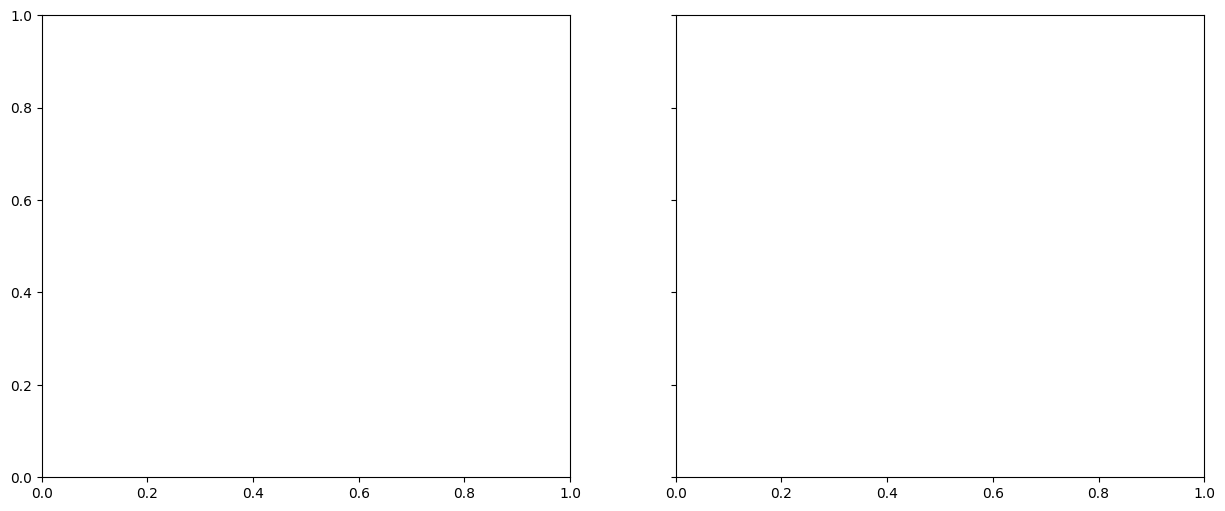

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

In [66]:
# Plot for XGBoost
sns.scatterplot(x=y_test, y=pred_xgb_y, ax=ax[0], color='blue', alpha=0.6)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[0].set_title(f'XGBoost\nR2: {r2_score(y_test, pred_xgb_y):.3f}')
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')

Text(4.444444444444452, 0.5, 'Predicted Values')

In [67]:
# Plot for Linear Regression
sns.scatterplot(x=y_test, y=pred_lr_y, ax=ax[1], color='green', alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[1].set_title(f'Linear Regression\nR2: {r2_score(y_test, pred_lr_y):.3f}')
ax[1].set_xlabel('Actual Values')

Text(0.5, 4.444444444444452, 'Actual Values')

In [68]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [69]:
### combine these code to plot it

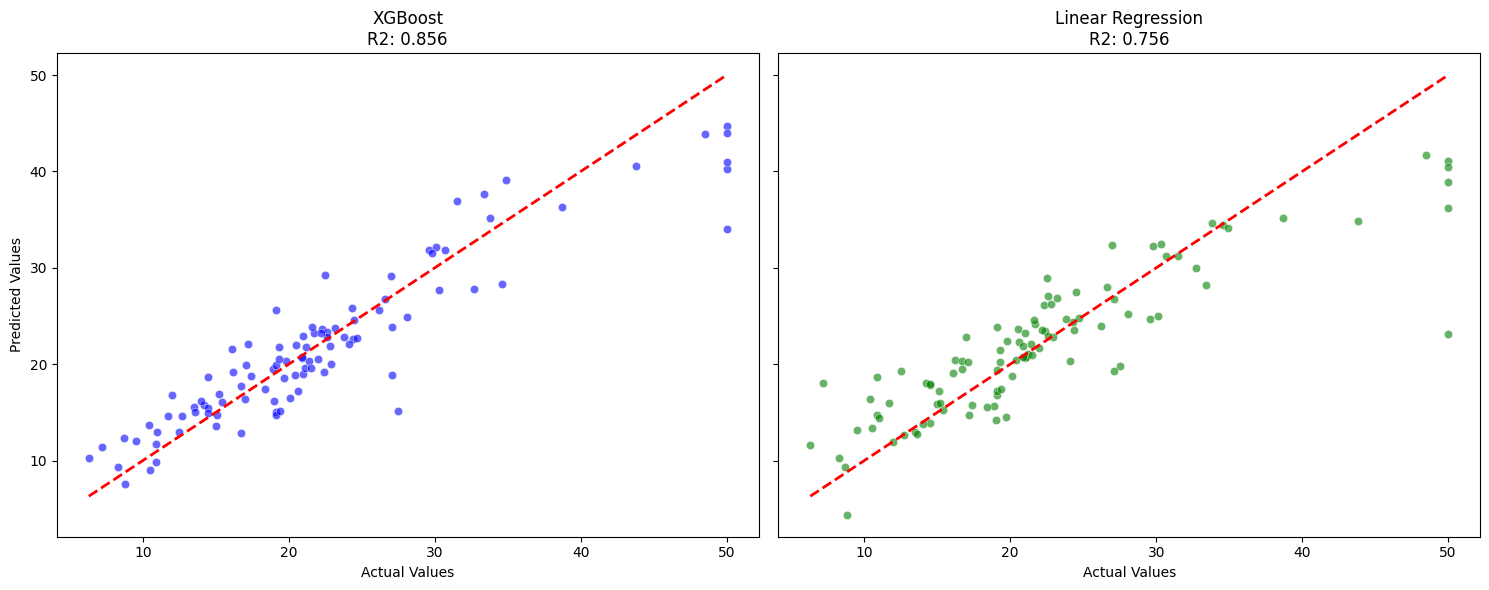

In [75]:
pred_xgb_y=xgb_final_model.predict(x_test)
pred_lr_y=linear_model.predict(x_test)
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for XGBoost
sns.scatterplot(x=y_test, y=pred_xgb_y, ax=ax[0], color='blue', alpha=0.6)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[0].set_title(f'XGBoost\nR2: {r2_score(y_test, pred_xgb_y):.3f}')
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')

# Plot for Linear Regression
sns.scatterplot(x=y_test, y=pred_lr_y, ax=ax[1], color='green', alpha=0.6)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax[1].set_title(f'Linear Regression\nR2: {r2_score(y_test, pred_lr_y):.3f}')
ax[1].set_xlabel('Actual Values')

plt.tight_layout()
plt.show()


In [77]:
find_parameter.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_learning_rate,params_lembda,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,1.951500e+01,2025-12-16 17:11:14.854600,2025-12-16 17:11:24.802067,0 days 00:00:09.947467,8.907682,0.5,0.0010,0.282818,3,11,23456,0.3,COMPLETE
1,1,8.203337e+01,2025-12-16 17:11:24.802067,2025-12-16 17:11:35.112526,0 days 00:00:10.310459,0.151184,0.3,0.0001,0.003933,10,45,3345,0.4,COMPLETE
2,2,9.677764e+01,2025-12-16 17:11:35.114531,2025-12-16 17:11:44.470249,0 days 00:00:09.355718,0.028541,0.8,0.0001,0.569966,13,178,3345,0.5,COMPLETE
3,3,3.664813e+01,2025-12-16 17:11:44.471376,2025-12-16 17:11:54.489854,0 days 00:00:10.018478,0.005339,0.9,0.3000,0.190661,8,115,3345,0.8,COMPLETE
4,4,1.824043e+01,2025-12-16 17:11:54.491183,2025-12-16 17:12:04.716549,0 days 00:00:10.225366,0.000690,0.5,0.3000,0.000127,3,16,10,0.3,COMPLETE
5,5,8.387120e+01,2025-12-16 17:12:04.718609,2025-12-16 17:12:15.599385,0 days 00:00:10.880776,0.178143,0.3,0.0010,0.017070,7,87,10,0.4,COMPLETE
6,6,1.470894e+01,2025-12-16 17:12:15.601388,2025-12-16 17:12:26.851617,0 days 00:00:11.250229,0.000268,0.8,0.1000,0.008916,2,41,3345,0.7,COMPLETE
7,7,9.670398e+01,2025-12-16 17:12:26.851617,2025-12-16 17:12:35.396855,0 days 00:00:08.545238,0.000101,0.3,0.0500,0.000495,2,176,20,0.4,COMPLETE
8,8,2.476434e+01,2025-12-16 17:12:35.398861,2025-12-16 17:12:44.653335,0 days 00:00:09.254474,0.001243,0.3,0.0100,0.003928,9,54,20,0.5,COMPLETE
9,9,9.678592e+01,2025-12-16 17:12:44.653335,2025-12-16 17:12:52.836486,0 days 00:00:08.183151,0.000112,0.5,0.0500,0.043543,13,175,10,0.1,COMPLETE


In [78]:
optuna.visualization.plot_optimization_history(find_parameter)

In [79]:
optuna.visualization.plot_slice(find_parameter)